In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import requests
from pprint import pprint
from pandas import json_normalize
import json
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import linregress


In [8]:
districtdata = pd.read_csv("/Users/Michael/Documents/GT DA/Project1/District Data/district_data.csv")
incomedata = pd.read_csv("/Users/Michael/Documents/GT DA/Project1/Income Data/combined_income.csv")

In [10]:
combinedschooldata = pd.merge(districtdata, incomedata, on="County")
combinedschooldata

,Unnamed: 0,City,County,District Name,Number of High Schools,Number of Middle Schools,Number of Alternative Schools,Number of Primary Schools,Number of Total Schools,State_x,Rank,RankOf,RankStatewidePercentage,Year,Zip Code,State_y,2016,2017,2018
0,0,Baxley,Appling,Appling County,1,1,0,4,6,GA,88.0,196.0,55.10,2019.0,31513,GA,30860,32080,33268
1,1,Pearson,Atkinson,Atkinson County,1,1,0,2,4,GA,75.0,196.0,61.73,2019.0,31642,GA,26599,28764,30511
2,2,Atlanta,Fulton,Atlanta Public Schools,16,15,2,56,89,GA,136.0,196.0,30.61,2019.0,30335,GA,75987,80683,84386
3,45,Atlanta,Fulton,Commission Charter Schools- Atlanta Heights Ch...,0,0,0,1,1,GA,188.0,196.0,4.08,2019.0,30331,GA,75987,80683,84386
4,3,Alma,Bacon,Bacon County,1,1,0,2,4,GA,85.0,196.0,56.63,2019.0,31510,GA,31025,32775,33080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,339,Raleigh,Wake,Casa Esperanza Montessori,0,0,0,1,1,NC,87.0,242.0,64.05,2019.0,27616,NC,54584,55860,59014
649,336,Durham,Durham,Carter Community Charter,0,0,0,1,1,NC,220.0,242.0,9.09,2019.0,27705,NC,46255,48051,50698
650,338,Beaufort,Carteret,Carteret County Public Schools,4,4,1,9,18,NC,38.0,242.0,84.30,2019.0,28516,NC,46800,47248,49360
651,340,Yanceyville,Caswell,Caswell County Schools,1,1,0,4,6,NC,186.0,242.0,23.14,2019.0,27379,NC,33394,34566,35591


In [17]:

del combinedschooldata['Year']

In [21]:

pd.set_option('display.max_rows', None)
combinedschooldata

,Unnamed: 0,City,County,District Name,Number of High Schools,Number of Middle Schools,Number of Alternative Schools,Number of Primary Schools,Number of Total Schools,Rank,RankOf,RankStatewidePercentage,Zip Code,State_y,2016,2017,2018
0,0,Baxley,Appling,Appling County,1,1,0,4,6,88.0,196.0,55.10,31513,GA,30860,32080,33268
1,1,Pearson,Atkinson,Atkinson County,1,1,0,2,4,75.0,196.0,61.73,31642,GA,26599,28764,30511
2,2,Atlanta,Fulton,Atlanta Public Schools,16,15,2,56,89,136.0,196.0,30.61,30335,GA,75987,80683,84386
3,45,Atlanta,Fulton,Commission Charter Schools- Atlanta Heights Ch...,0,0,0,1,1,188.0,196.0,4.08,30331,GA,75987,80683,84386
4,3,Alma,Bacon,Bacon County,1,1,0,2,4,85.0,196.0,56.63,31510,GA,31025,32775,33080
5,4,Newton,Baker,Baker County,0,0,1,0,1,NaN,NaN,NaN,31770,FL,29613,31076,32313
6,4,Newton,Baker,Baker County,0,0,1,0,1,NaN,NaN,NaN,31770,GA,36061,35725,38666
7,200,MacClenny,Baker,Baker,2,1,0,6,9,NaN,NaN,NaN,32063,FL,29613,31076,32313
8,200,MacClenny,Baker,Baker,2,1,0,6,9,NaN,NaN,NaN,32063,GA,36061,35725,38666
9,5,Milledgeville,Baldwin,Baldwin County,1,1,0,4,6,186.0,196.0,5.10,31061,AL,42907,43989,45596


In [24]:
cleandata = combinedschooldata.dropna()
cleandata.count()

Unnamed: 0                       588
City                             588
County                           588
District Name                    588
Number of High Schools           588
Number of Middle Schools         588
Number of Alternative Schools    588
Number of Primary Schools        588
Number of Total Schools          588
Rank                             588
RankOf                           588
RankStatewidePercentage          588
Zip Code                         588
State_y                          588
2016                             588
2017                             588
2018                             588
dtype: int64

In [25]:
countydf = cleandata.sort_values(
    ["County"], ascending=True)
countydf.head(20)


,Unnamed: 0,City,County,District Name,Number of High Schools,Number of Middle Schools,Number of Alternative Schools,Number of Primary Schools,Number of Total Schools,Rank,RankOf,RankStatewidePercentage,Zip Code,State_y,2016,2017,2018
457,149,Abbeville,Abbeville,Abbeville 60,3,1,0,5,9,6.0,82.0,92.68,29620,SC,31893,32937,34108
458,150,Aiken,Aiken,Aiken 01,10,12,0,21,43,34.0,82.0,58.54,29803,SC,39387,40893,42511
522,199,Gainesville,Alachua,Alachua,15,10,6,33,64,40.0,67.0,40.30,32601,FL,40608,42455,44390
613,300,Burlington,Alamance,Alamance-Burlington Schools,8,7,1,20,36,162.0,242.0,33.06,27217,NC,37317,38141,39342
324,127,Corinth,Alcorn,Corinth School District,1,1,0,1,3,61.0,129.0,52.71,38834,MS,33076,34364,36003
323,101,Corinth,Alcorn,Alcorn School District,5,2,0,3,10,31.0,129.0,75.97,38834,MS,33076,34364,36003
614,301,Taylorsville,Alexander,Alexander County Schools,1,2,1,7,11,68.0,242.0,71.90,28681,NC,34082,36178,37438
615,302,Sparta,Alleghany,Alleghany County Schools,1,0,0,3,4,77.0,242.0,68.18,28675,NC,36440,36949,37549
459,151,Fairfax,Allendale,Allendale 01,1,1,0,2,4,74.0,82.0,9.76,29827,SC,29642,31593,33237
325,102,Liberty,Amite,Amite County School District,2,0,0,1,3,120.0,129.0,6.98,39645,MS,30465,32432,33460


In [26]:
newindexdf = countydf.set_index('County',drop=True)
newindexdf

,Unnamed: 0,City,District Name,Number of High Schools,Number of Middle Schools,Number of Alternative Schools,Number of Primary Schools,Number of Total Schools,Rank,RankOf,RankStatewidePercentage,Zip Code,State_y,2016,2017,2018
County,,,,,,,,,,,,,,,,
Abbeville,149,Abbeville,Abbeville 60,3,1,0,5,9,6.0,82.0,92.68,29620,SC,31893,32937,34108
Aiken,150,Aiken,Aiken 01,10,12,0,21,43,34.0,82.0,58.54,29803,SC,39387,40893,42511
Alachua,199,Gainesville,Alachua,15,10,6,33,64,40.0,67.0,40.30,32601,FL,40608,42455,44390
Alamance,300,Burlington,Alamance-Burlington Schools,8,7,1,20,36,162.0,242.0,33.06,27217,NC,37317,38141,39342
Alcorn,127,Corinth,Corinth School District,1,1,0,1,3,61.0,129.0,52.71,38834,MS,33076,34364,36003
Alcorn,101,Corinth,Alcorn School District,5,2,0,3,10,31.0,129.0,75.97,38834,MS,33076,34364,36003
Alexander,301,Taylorsville,Alexander County Schools,1,2,1,7,11,68.0,242.0,71.90,28681,NC,34082,36178,37438
Alleghany,302,Sparta,Alleghany County Schools,1,0,0,3,4,77.0,242.0,68.18,28675,NC,36440,36949,37549
Allendale,151,Fairfax,Allendale 01,1,1,0,2,4,74.0,82.0,9.76,29827,SC,29642,31593,33237


In [34]:
finaldf = newindexdf.rename(columns={"State_y":"State",
                          "2016": "2016 Income Per Capita ($)",
                          "2017": "2017 Income Per Capita ($)",
                          "2018": "2018 Income Per Capita ($)"})

In [30]:
newindexdf.to_csv("/Users/Michael/Documents/GT DA/Project1/incomeschooldata.csv")

Text(0, 0.5, 'School Ranking (Percentile, Statewide)')

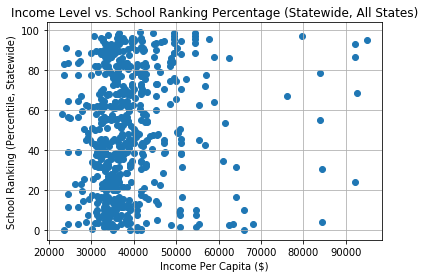

In [36]:
income = finaldf['2018 Income Per Capita ($)']
rank = finaldf['RankStatewidePercentage']

plt.scatter(income, rank)
plt.grid()
plt.title("Income Level vs. School Ranking Percentage (Statewide, All States)")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("School Ranking (Percentile, Statewide)")

Text(0, 0.5, 'School Ranking (Percentile, GA)')

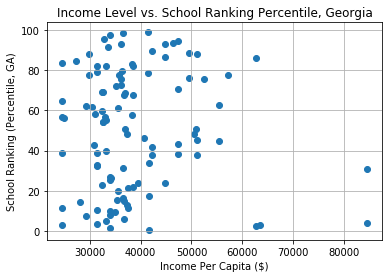

In [40]:
garanking = finaldf.loc[(finaldf['State'] == 'GA')]
gaincome = garanking['2018 Income Per Capita ($)']
garank = garanking['RankStatewidePercentage']

plt.scatter(gaincome, garank)
plt.grid()
plt.title("Income Level vs. School Ranking Percentile, Georgia")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("School Ranking (Percentile, GA)")

Text(0, 0.5, 'School Ranking (GA Top Ten)')

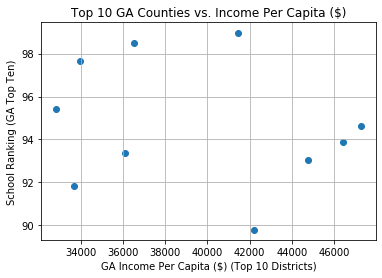

In [54]:

gasorted = garanking.sort_values(
    ["RankStatewidePercentage"], ascending=False)
toptenga = gasorted.head(10)
toptenincome = toptenga['2018 Income Per Capita ($)']
garank = toptenga['RankStatewidePercentage']

plt.scatter(toptenincome, garank)
plt.grid()
plt.title("Top 10 GA Counties vs. Income Per Capita ($)")
plt.xlabel("GA Income Per Capita ($) (Top 10 Districts)")
plt.ylabel("School Ranking (GA Top Ten)")

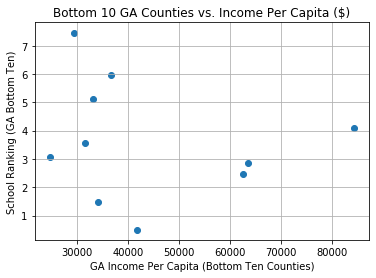

In [58]:
gasortedlow = garanking.sort_values(
    ["RankStatewidePercentage"], ascending=True)
bottomtenga = gasortedlow.head(10)
bottomtenincome = bottomtenga['2018 Income Per Capita ($)']
garanklow = bottomtenga['RankStatewidePercentage']

plt.scatter(bottomtenincome, garanklow)
plt.title("Bottom 10 GA Counties vs. Income Per Capita ($)")
plt.xlabel("GA Income Per Capita (Bottom Ten Counties)")
plt.ylabel("School Ranking (GA Bottom Ten)")
plt.grid()

R-Value: 0.11539404232528741


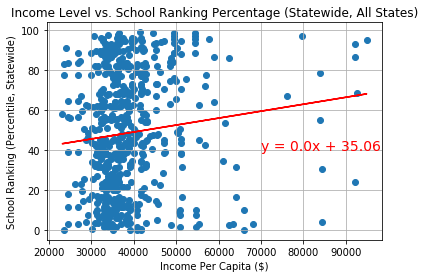

In [67]:
income = finaldf['2018 Income Per Capita ($)']
rank = finaldf['RankStatewidePercentage']


(slope, intercept, rvalue, pvalue, stderr) = linregress(income.astype(float), rank.astype(float))
regress_values = income.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(income, rank)
plt.plot(income, regress_values, "r-")
plt.annotate(line_eq, (70000,40), fontsize=14, color='red')
plt.grid()
plt.title("Income Level vs. School Ranking Percentage (Statewide, All States)")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("School Ranking (Percentile, Statewide)")
print(f"R-Value: {rvalue}")


R-Value: -0.020077467636628668


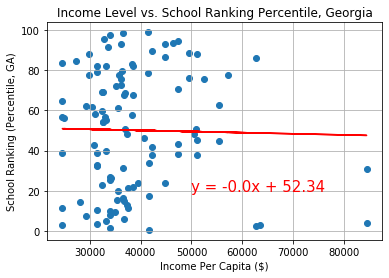

In [71]:
garanking = finaldf.loc[(finaldf['State'] == 'GA')]
gaincome = garanking['2018 Income Per Capita ($)']
garank = garanking['RankStatewidePercentage']

(slope, intercept, rvalue, pvalue, stderr) = linregress(gaincome, garank)
regress_values = gaincome.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(gaincome, garank)
plt.plot(gaincome, regress_values, "r-")
plt.annotate(line_eq, (50000,20), fontsize=15, color='red')
plt.grid()
plt.title("Income Level vs. School Ranking Percentile, Georgia")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("School Ranking (Percentile, GA)")
print(f"R-Value: {rvalue}")

Text(0, 0.5, '2018 Income Per Capita ($)')

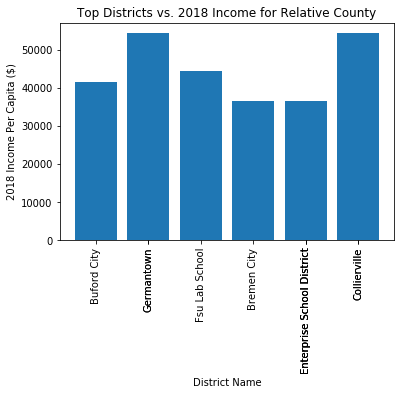

In [89]:
top = finaldf.sort_values(
    ["RankStatewidePercentage"], ascending=False)
topten= top.head(10)
toptenincome = topten['2018 Income Per Capita ($)']
toptenrank = topten['RankStatewidePercentage']
toptencounty = topten['District Name']

plt.bar(toptencounty, toptenincome, align='center')
tickloc = [item for item in topten['District Name']]
plt.xticks(tickloc, rotation='vertical')
plt.title("Top Districts vs. 2018 Income for Relative County")
plt.xlabel("District Name")
plt.ylabel("2018 Income Per Capita ($)")

Text(0, 0.5, 'Number of Counties')

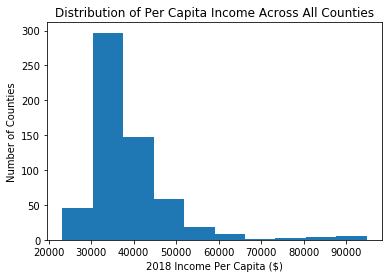

In [92]:
plt.hist(income)
plt.title("Distribution of Per Capita Income Across All Counties")
plt.xlabel("2018 Income Per Capita ($)")
plt.ylabel("Number of Counties")

([<matplotlib.axis.XTick at 0x7fb4946cfd68>,
 <a list of 7 Text xticklabel objects>)

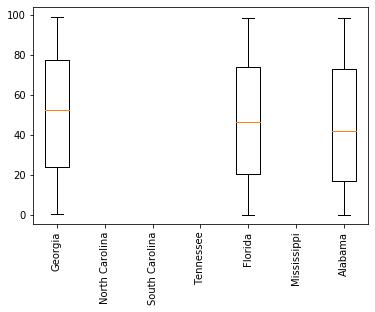

In [95]:
fig1, ax1 = plt.subplots()
ga = finaldf.loc[(finaldf['State'] == 'GA')]
nc = finaldf.loc[(finaldf['State'] == 'NC')]
sc = finaldf.loc[(finaldf['State'] == 'SC')]
tn = finaldf.loc[(finaldf['State'] == 'TN')]
fl = finaldf.loc[(finaldf['State'] == 'FL')]
ms = finaldf.loc[(finaldf['State'] == 'MS')]
al = finaldf.loc[(finaldf['State'] == 'AL')]
ga1 = ga['RankStatewidePercentage']
nc1 = nc['RankStatewidePercentage']
sc1 = sc['RankStatewidePercentage']
tn1 = tn['RankStatewidePercentage']
fl1 = fl['RankStatewidePercentage']
ms1 = ms['RankStatewidePercentage']
al1 = al['RankStatewidePercentage']

ax1.boxplot([ga1, nc1, sc1, tn1, fl1, ms1, al1])
plt.xticks([1,2,3,4,5,6,7],['Georgia', 'North Carolina','South Carolina', 'Tennessee', 'Florida', 'Mississippi',
                           'Alabama'], rotation='vertical')

In [97]:
print(f"The correlation coefficient between between income level and school ratings of the counties in South East is {round(st.pearsonr(income,rank)[0],2)}")

The correlation coefficient between between income level and school ratings of the counties in South East is 0.12


Text(0, 0.5, 'High School Ranking (Percentile, Statewide)')

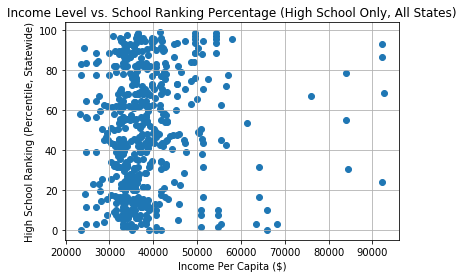

In [102]:
highschool = finaldf.loc[(finaldf['Number of High Schools'] > 0)]
highschoolincome = highschool['2018 Income Per Capita ($)']
highschoolrank = highschool['RankStatewidePercentage']

plt.scatter(highschoolincome, highschoolrank)
plt.grid()
plt.title("Income Level vs. School Ranking Percentage (High School Only, All States)")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("High School Ranking (Percentile, Statewide)")

Text(0, 0.5, 'Middle School Ranking (Percentile, Statewide)')

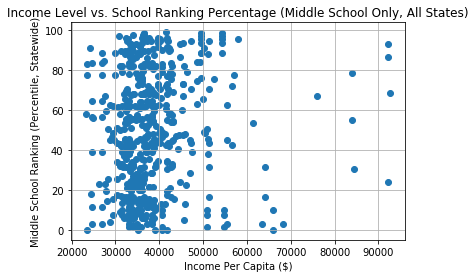

In [103]:
middleschool = finaldf.loc[(finaldf['Number of Middle Schools'] > 0)]
middleschoolincome = middleschool['2018 Income Per Capita ($)']
middleschoolrank = middleschool['RankStatewidePercentage']

plt.scatter(highschoolincome, highschoolrank)
plt.grid()
plt.title("Income Level vs. School Ranking Percentage (Middle School Only, All States)")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("Middle School Ranking (Percentile, Statewide)")

Text(0, 0.5, 'Primary School Ranking (Percentile, Statewide)')

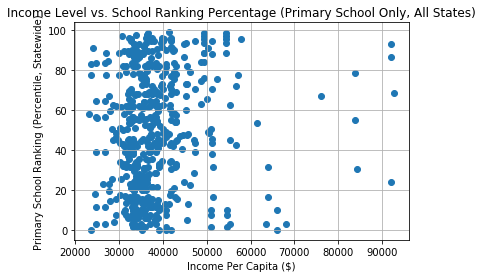

In [104]:
primaryschool = finaldf.loc[(finaldf['Number of Primary Schools'] > 0)]
primaryschoolincome = primaryschool['2018 Income Per Capita ($)']
primaryschoolrank = primaryschool['RankStatewidePercentage']

plt.scatter(highschoolincome, highschoolrank)
plt.grid()
plt.title("Income Level vs. School Ranking Percentage (Primary School Only, All States)")
plt.xlabel("Income Per Capita ($)")
plt.ylabel("Primary School Ranking (Percentile, Statewide)")